### import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu
from scipy.stats import fisher_exact
from sklearn.metrics import confusion_matrix
import utility
import importlib
pd.set_option('mode.chained_assignment', None)

##### Read gain data

In [2]:
df = pd.read_excel("Gain_calulated_unfiltered_vcf.xlsx", sheet_name="Gain_calulated_unfiltered_vcf")

In [3]:
df

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,1525964,chrIV,C,T,P3G10,0,0,0,1,2,0,3,5,12,7,18,0,8.835324
133534,1525964,chrIV,C,T,P3G11,2,0,1,1,0,0,0,0,6,0,4,0,8.835324
133535,1525998,chrIV,T,C,P3B07,0,0,1,1,3,0,2,0,0,1,8,0,-14.496006
133536,1525998,chrIV,T,C,P3B10,0,0,0,4,2,1,0,0,3,2,0,0,-14.496006


##### Read media data

In [4]:
df_media = pd.read_excel("Gain_calulated_unfiltered_vcf.xlsx", sheet_name="media")
df_media = df_media.rename(columns={'platewell': 'population_name'})
df_media

,population_name,Plate,Strain
0,P1B02,YPD 30°C,a
1,P1B04,YPD 30°C,a
2,P1B07,YPD 30°C,diploid
3,P1B11,YPD 30°C,alpha
4,P1C02,YPD 30°C,a
...,...,...,...
84,P3G05,SC 37°C,a
85,P3G06,SC 37°C,a
86,P3G09,SC 37°C,diploid
87,P3G10,SC 37°C,diploid


##### calculate sum of allele count across all generation

In [5]:
df["sum of alt AC"] = df['G70_alt_counts'] + df['G1410_alt_counts'] + \
df['G2640_alt_counts'] + df['G5150_alt_counts'] + df['G7530_alt_counts'] + df['G10150_alt_counts']
df

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,11
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,1358
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,28
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,5
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133533,1525964,chrIV,C,T,P3G10,0,0,0,1,2,0,3,5,12,7,18,0,8.835324,45
133534,1525964,chrIV,C,T,P3G11,2,0,1,1,0,0,0,0,6,0,4,0,8.835324,10
133535,1525998,chrIV,T,C,P3B07,0,0,1,1,3,0,2,0,0,1,8,0,-14.496006,11
133536,1525998,chrIV,T,C,P3B10,0,0,0,4,2,1,0,0,3,2,0,0,-14.496006,5


##### Add allele switch column

In [6]:
df["allele switch"] = df["REF"]+ "->" + df["ALT"]
df.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,G10150_ref_counts,G70_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,56,0,0,0,0,11,0,-3.577119,11,C->A
1,34,2-micron,G,T,P1E04,74,104,3,0,0,1,0,217,426,323,156,236,0.392871,1358,G->T
2,34,chrII,G,A,P2C06,4,0,1,0,2,1,0,0,0,0,16,12,-4.563850,28,G->A
3,36,chrIX,C,A,P2F11,24,5,39,2,34,2,0,0,0,0,5,0,-11.012777,5,C->A
4,36,chrIX,C,A,P3F11,44,1,38,4,18,2,0,0,0,0,9,0,-11.012777,9,C->A


##### Merge gain and media dataset based on population name

In [7]:
df_with_strain_media = pd.merge(df, df_media, on="population_name", how="left")
df_with_strain_media.head()

,Position,CHROM,REF,ALT,population_name,G70_ref_counts,G1410_ref_counts,G2640_ref_counts,G5150_ref_counts,G7530_ref_counts,...,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G7530_alt_counts,G10150_alt_counts,accumulate_gain,sum of alt AC,allele switch,Plate,Strain
0,31,chrVIII,C,A,P3G06,35,31,59,38,42,...,0,0,0,11,0,-3.577119,11,C->A,SC 37°C,a
1,34,2-micron,G,T,P1E04,74,104,3,0,0,...,217,426,323,156,236,0.392871,1358,G->T,YPD 30°C,a
2,34,chrII,G,A,P2C06,4,0,1,0,2,...,0,0,0,16,12,-4.563850,28,G->A,SC 30°C,a
3,36,chrIX,C,A,P2F11,24,5,39,2,34,...,0,0,0,5,0,-11.012777,5,C->A,SC 30°C,alpha
4,36,chrIX,C,A,P3F11,44,1,38,4,18,...,0,0,0,9,0,-11.012777,9,C->A,SC 37°C,alpha


##### Convert the data to consider the mutation of all generation of every population format

In [8]:
all_mutation = pd.DataFrame()
gen_list = ['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts',
            'G10150_alt_counts']

for i in gen_list:
    new_df_tmp = pd.DataFrame()
    new_df = df[df.loc[:, i]!=0]
    new_df_tmp = new_df[['CHROM', 'Position', 'allele switch', 'population_name']]
    new_df_tmp.loc[:, "generation"] = i
    new_df_tmp.loc[:, "AG"] = new_df.loc[:, "accumulate_gain"]
    new_df_tmp.loc[:, "allele count"] = new_df.loc[:, i]
    all_mutation = pd.concat([all_mutation, new_df_tmp], axis = 0)
    
all_mutation.reset_index(inplace=True, drop=True)
all_mutation['generation_number'] = all_mutation['generation'].str.extract(r'(\d+)').astype(int)

In [9]:
all_mutation # The all_mutation dataframe contain generation and population wise accumulated gain

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5,70
...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4,10150
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2,10150
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2,10150
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6,10150


##### prepare pivot table for population name vs generation for accumulated gain when using mean as aggregate function 

In [10]:
pivot_table_mean = all_mutation.pivot_table(index='population_name', columns='generation', aggfunc='mean', values = "AG")

In [11]:
pivot_table_mean

generation,G10150_alt_counts,G1410_alt_counts,G2640_alt_counts,G5150_alt_counts,G70_alt_counts,G7530_alt_counts
population_name,,,,,,
P1B02,-0.816658,-1.247184,-1.261906,-0.905225,-1.396530,-1.036239
P1B03,-0.975267,-1.186287,-1.254416,-1.254803,-1.617979,-1.180247
P1B04,-0.938301,-0.746944,-1.311274,-0.983932,-1.410743,-0.899818
P1B07,-1.337435,-1.424458,-1.367442,-1.331054,-1.521762,-1.452116
P1B11,-0.969768,-1.366757,-1.511132,-1.057513,-1.538782,-1.165048
...,...,...,...,...,...,...
P3G05,-0.506031,-1.411253,-1.140614,-1.196850,-1.675594,-0.684569
P3G06,-0.700654,-1.332929,-1.210593,-0.858739,-1.283722,-0.882827
P3G09,-0.920763,-1.210276,-1.421965,-1.195182,-1.579595,-1.393213


##### plot heatmap for population name vs generation for accumulated gain when using mean as aggregate function

###### It shows the heatmap of mean accumulated gain, where the row indicate a population and column indicate generation.

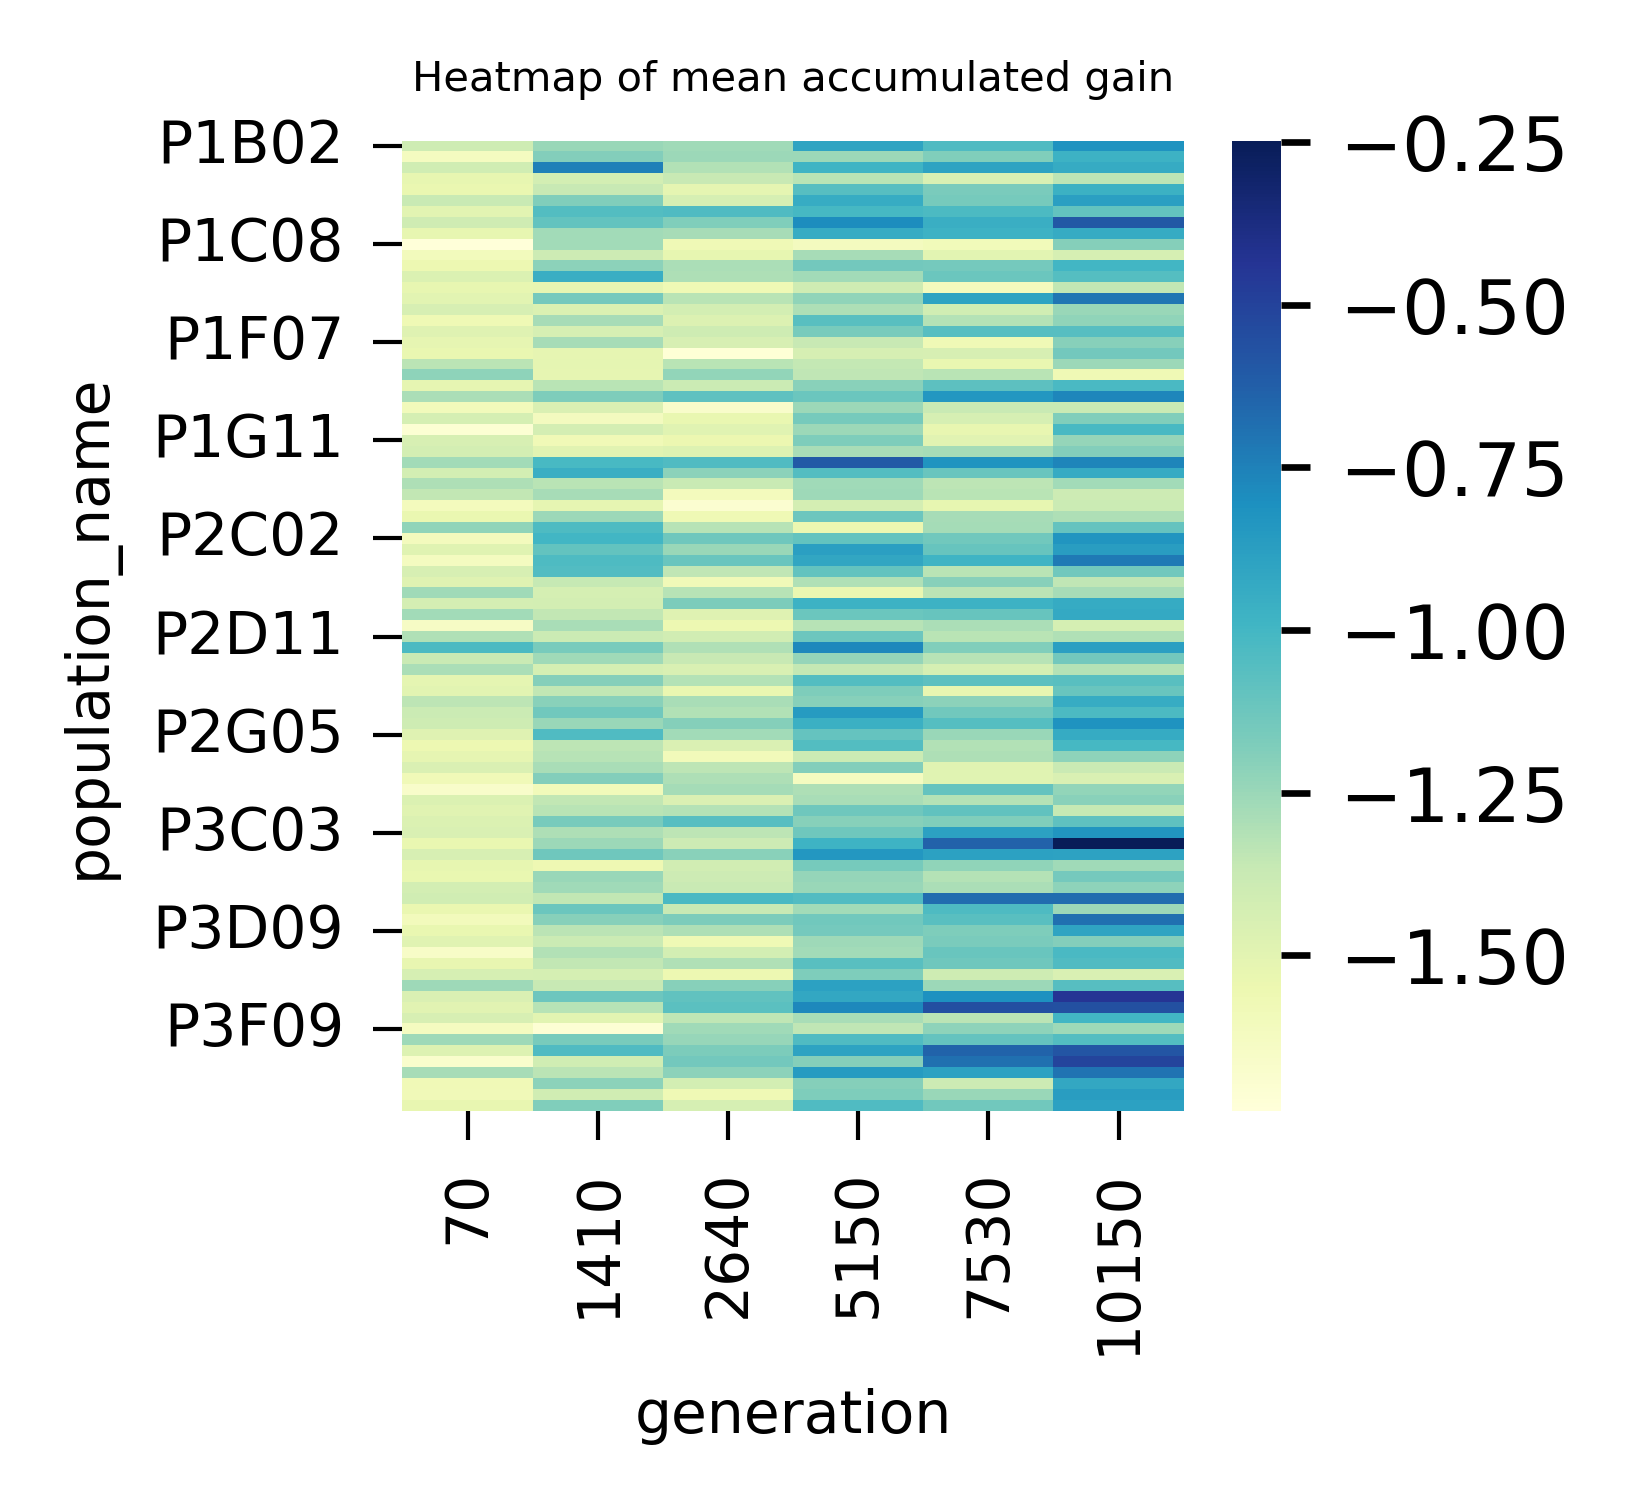

In [12]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1, 2.1))
heatmap_mean = sns.heatmap(pivot_table_mean[['G70_alt_counts', 'G1410_alt_counts', 'G2640_alt_counts', 'G5150_alt_counts', 'G7530_alt_counts', 'G10150_alt_counts']], cmap='YlGnBu', ax=ax, label="mean")
ax = utility.custom_figure_axis(ax, fontsize=7, show_ticks = True)
ax.set_title("Heatmap of mean accumulated gain", fontsize=5)
custom_labels = ["70", "1410", "2640", "5150", "7530", "10150"]
ax.set_xticklabels(custom_labels)
cbar = heatmap_mean.collections[0].colorbar
cbar.ax.tick_params(labelsize=9)
# plt.savefig("yeast mean of accumulated gain in population vs generation.pdf", dpi = 600, bbox_inches="tight")

##### Allele switch vs accumulated gain (unique mutation)

###### It shows the box plot of accumulated gain for every possible allele change.

In [13]:
allele_switch_group1 = ['C->G','A->C','A->T','T->G','G->C','T->A', 'C->A',  'G->T'] # Transversion group
allele_switch_group2 = ['G->A', 'C->T', 'A->G','T->C'] # Transition group
df_allele_switch_group1 = df[df["allele switch"].isin(allele_switch_group1)]
df_allele_switch_group2 = df[df["allele switch"].isin(allele_switch_group2)]
formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))

p_value = utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain'])
print("The one sided greater p value between Transition group and Transversion group is : ", p_value)

The one sided greater p value between Transition group and Transversion group is :  1.0


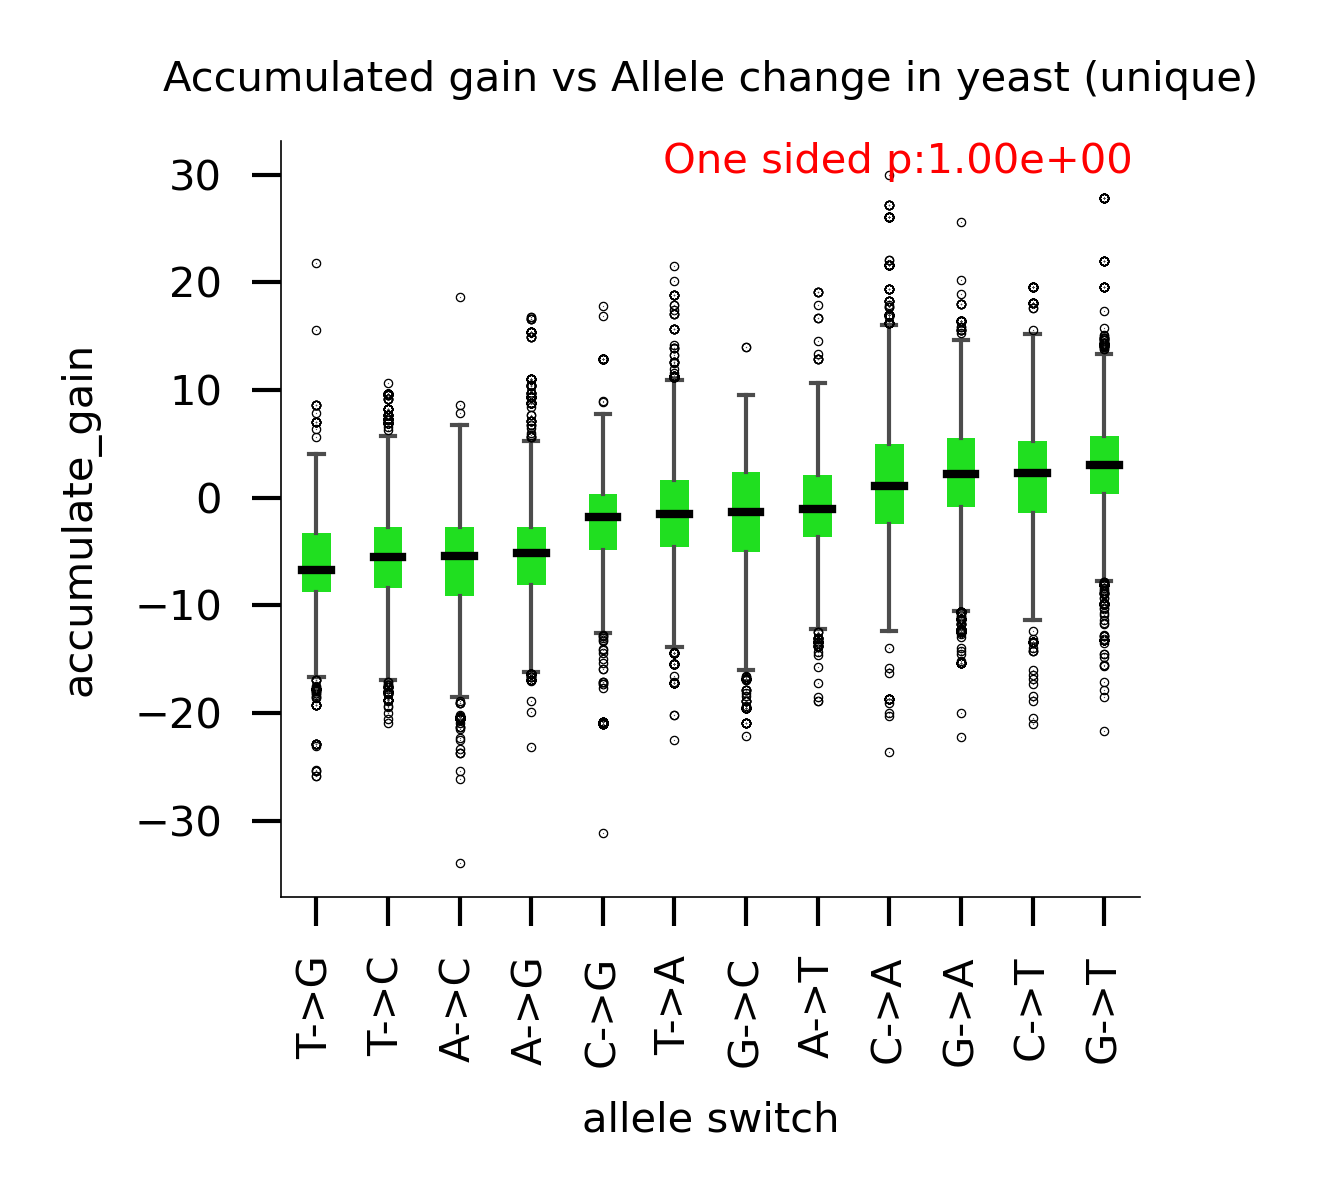

In [14]:
fig, ax = plt.subplots(1, 1, dpi = 600, figsize =(2.1,2.1))
ax = utility.box_plot(data= df, x = 'allele switch', y = 'accumulate_gain', ax = ax)
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_title("Accumulated gain vs Allele change in yeast (unique)", fontsize=5)
offset=0.1
formatted_p = "{:.2e}".format(utility.man_whiteney(df_allele_switch_group2['accumulate_gain'], df_allele_switch_group1['accumulate_gain']))
ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=5, color='red', ha='right', va='top')
plt.tight_layout()
# plt.savefig("unfiltered accumulated gain vs allele change in yeast unique mutation.pdf", dpi = 600, bbox_inches="tight")

##### statistical test

In [15]:
ag_binary = np.where(df[ 'accumulate_gain'] > 0, 1, 0) # binarize the accumulated gain with zero as cut off
ac_binary = np.where(df["sum of alt AC"] > np.median(df["sum of alt AC"]), 1, 0) # binarize the sum of allele count with median as cut off
cm = confusion_matrix(ac_binary, ag_binary)

confusion_df = pd.DataFrame(cm, columns=['g_neg', 'g_pos'], index=['ac_low', 'ac_high']) # prepare the confusion matrix

odds_ratio, p_value_fisher = fisher_exact(np.array(confusion_df))

print("The confusion matrix is: \n", confusion_df)
# print("The ratio of High allele count/ low allele count for low accumulated gain is: ", cm[1][0]/cm[0][0])
# print("The ratio of High allele count/ low allele count for high accumulated gain is: ", cm[1][1]/cm[0][1])
# print("The ratio of pos gain/ neg gain for low allele count is: ", cm[0][1]/cm[0][0])
# print("The ratio of pos gain/ neg gain for high allele count is: ", cm[1][1]/cm[1][0])
print("Fisher's exact test p-value:", p_value_fisher)
# print("Hypergeometric test p-value:", p_value_hypergeom)

The confusion matrix is: 
          g_neg  g_pos
ac_low   40477  27694
ac_high  36859  28508
Fisher's exact test p-value: 2.18424819264883e-28


In [16]:
all_mutation

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7,70
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7,70
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7,70
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5,70
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5,70
...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4,10150
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2,10150
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2,10150
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6,10150


##### Accumulated gain vs generation

###### It shows the line plot of mean of accumulated gain vs generation where the the shaaded region indicate 95% confidence interval.

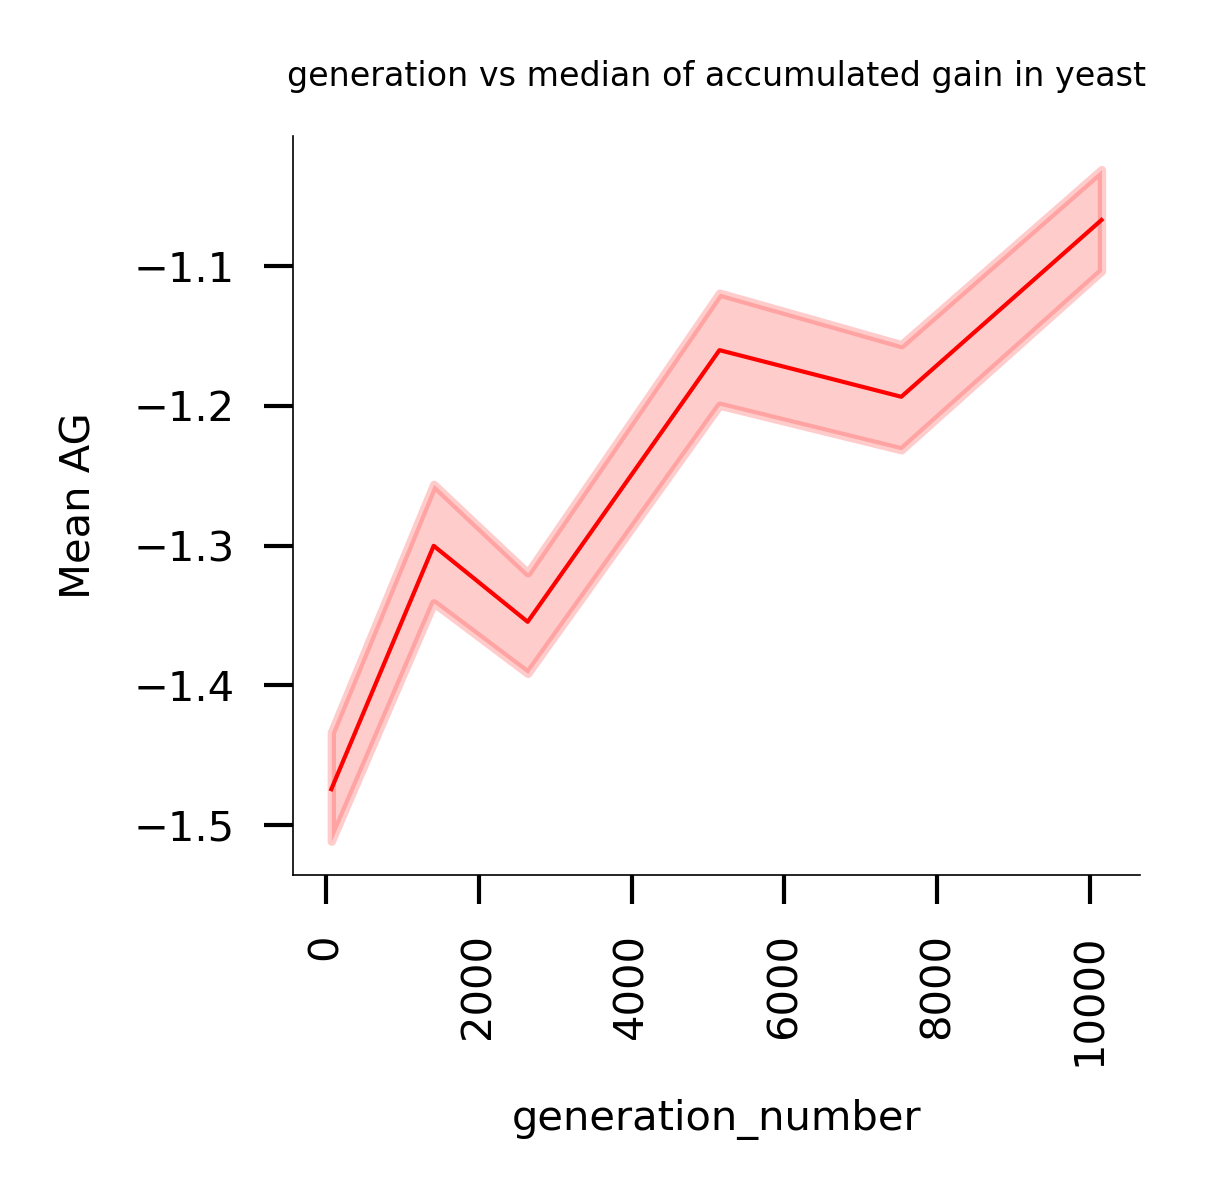

In [17]:
fig, ax = plt.subplots(1, 1 , dpi = 600, figsize = (2.1, 2.1))
ax = sns.lineplot(data = all_mutation, x = "generation_number", y = "AG", ax = ax, color="red", lw=0.5, estimator='mean')
ax = utility.custom_figure_axis(ax, fontsize=5, show_ticks = True)
ax.set_ylabel("Mean AG")
ax.set_title("generation vs median of accumulated gain in yeast", fontsize=4)
plt.tight_layout()
# plt.savefig("generation vs ag in yeast.pdf", dpi = 600)

##### merge all_mutation with media data

In [18]:
all_mutation_with_media = pd.merge(all_mutation, df_media, on = 'population_name', how='left')
all_mutation_with_media

,CHROM,Position,allele switch,population_name,generation,AG,allele count,generation_number,Plate,Strain
0,chrX,66,C->T,P1C11,G70_alt_counts,6.067923,7,70,YPD 30°C,alpha
1,chrX,69,T->A,P1C11,G70_alt_counts,-4.705100,7,70,YPD 30°C,alpha
2,chrX,73,C->T,P1C11,G70_alt_counts,3.963808,7,70,YPD 30°C,alpha
3,chrX,73,C->T,P2B04,G70_alt_counts,3.963808,5,70,SC 30°C,a
4,chrX,74,T->C,P1B02,G70_alt_counts,-2.479826,5,70,YPD 30°C,a
...,...,...,...,...,...,...,...,...,...,...
500926,chrIV,1525964,C->T,P3D10,G10150_alt_counts,8.835324,4,10150,SC 37°C,diploid
500927,chrIV,1525964,C->T,P3D11,G10150_alt_counts,8.835324,2,10150,SC 37°C,alpha
500928,chrIV,1525964,C->T,P3E08,G10150_alt_counts,8.835324,2,10150,SC 37°C,diploid
500929,chrIV,1525964,C->T,P3F09,G10150_alt_counts,8.835324,6,10150,SC 37°C,diploid


In [19]:
# all_mutation_with_media

##### Divide the allele count in quantile wise accumulated gain (Duplicate mutation)

In [20]:
lst_quantile_accumulated_gain_vs_allele, lst_quantile_accumulated_gain_vs_allele_only, lst_quantile_accumulated_gain_vs_allele_median =  utility.return_data_quantile_wise(all_mutation, column_name ="AG")
ag_quantile_wise_allele_count = utility.return_quantile_wise_allele_count(lst_quantile_accumulated_gain_vs_allele, column_name="AG", ignore_label_column =True)

##### Box plot of log10(AC) median vs quantile of acumulated gain (Duplicate mutation)

###### The top figure shows the box plot of log10(Allele count) vs quantile wise accumulated gain. The quantile of AG is formed with the step size of 5%. The buttom figure shows the median of log10(AC) vs quantile of AG (5% step size). The shaded area indicate the 95% confidence interval.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(-0.4166666666666785, 0.5, 'Median of log10(AC)')

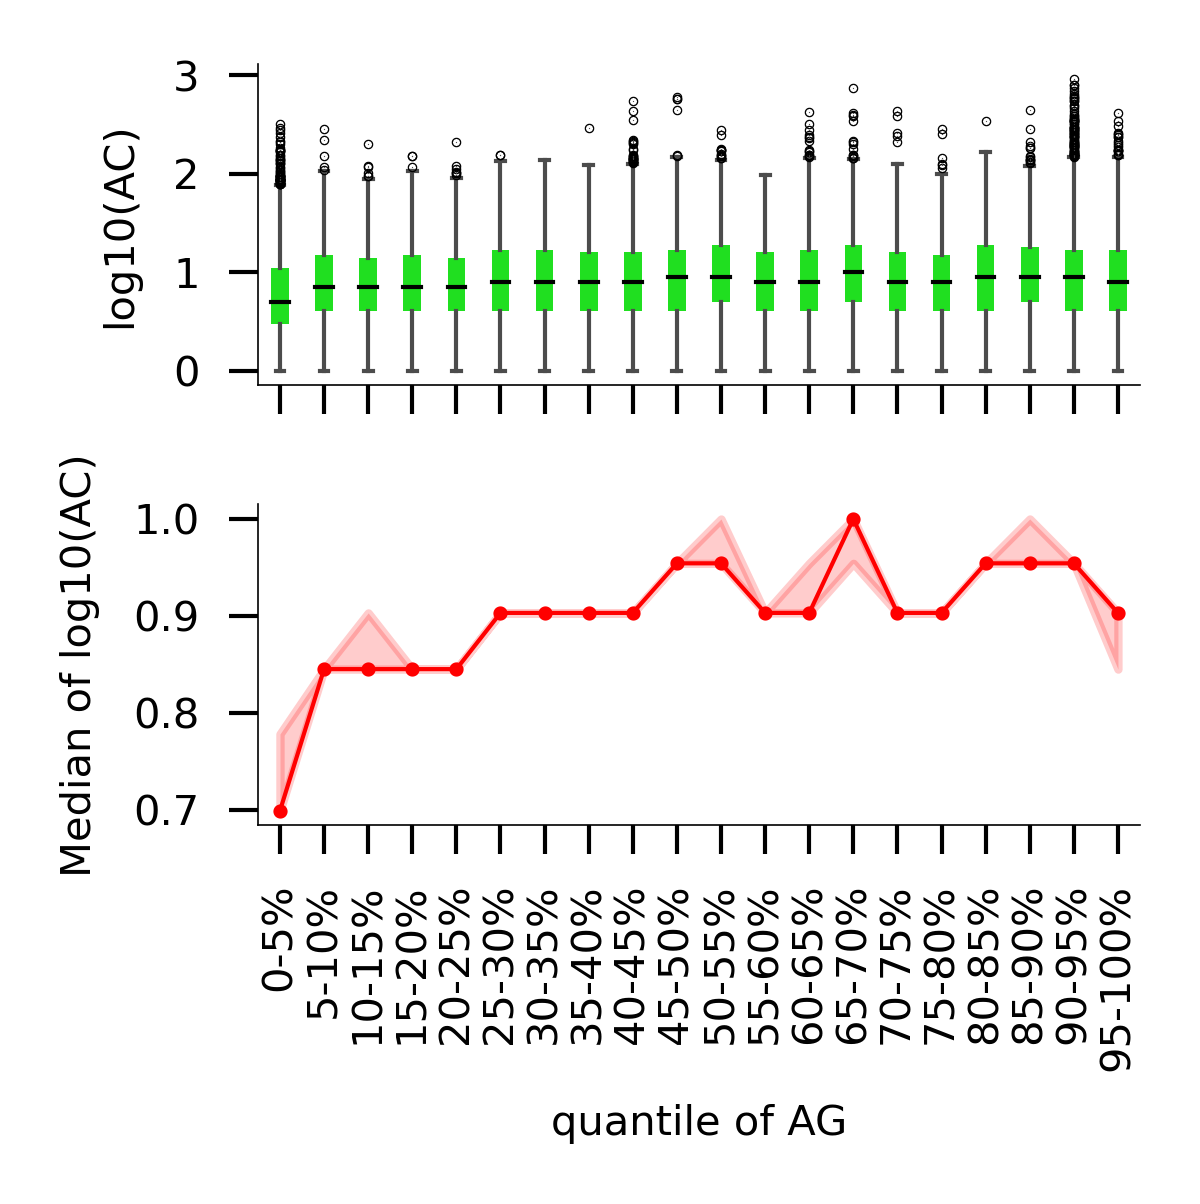

In [21]:
fig, ax = plt.subplots(2, 1 , dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax = utility.plot_ac_vs_column(ax=ax, data = ag_quantile_wise_allele_count, lst_quantile_dataframe_column_name_median = lst_quantile_accumulated_gain_vs_allele_median, show_ticks = True, fontsize=5, column_name = "AG")
# ax[0].set_title("log10(AC) vs quantile of AG", fontsize=5)
# formatted_p = utility.return_quantile_wise_pvalue(lst_quantile_accumulated_gain_vs_allele);
# ax[0].text((max(ax[0].get_xlim()) - offset), (max(ax[0].get_ylim()) - offset), "One sided p:" + formatted_p, fontsize=3, color='red', ha='right', va='top')
ax[0].set_yticks(np.arange(0, 3.1, 1))
ax[1].set_yticks(np.arange(0.7, 1, 0.1))
ax[1].set_ylabel("Median of log10(AC)")
# plt.savefig("unfiltered yeast log10(AC) vs quantile wise AG lineplot.pdf", dpi = 600, bbox_inches="tight")

##### The mean line plot of accumulated gain vs strain for different plates (Unique mutation)

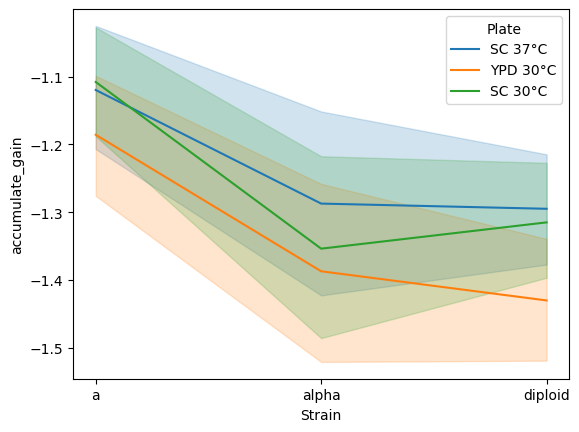

In [22]:
sns.lineplot(df_with_strain_media, y =  'accumulate_gain', x = 'Strain', hue = 'Plate', estimator='mean');

##### calculate generation wise median of log10(median allele count) vs median AG 

In [23]:
def return_median_data_gen_wise(data:pd.DataFrame(), x_column: str, y_column: str):
    
    
    """
     Calculate median values of specified columns grouped by 'generation_number'.
    
     Parameters:
     - data (pd.DataFrame): Input DataFrame containing the data.
     - x_column (str): Name of the column for x-axis.
     - y_column (str): Name of the column for y-axis.
    
     Returns:
     - pd.DataFrame: DataFrame containing median values of 'x_column' and 'y_column' grouped by 'generation_number'.
    
     Note:
     - This function calculates the median values of specified columns ('x_column' and 'y_column') grouped by 'generation_number'.
     - The resulting DataFrame has columns 'generation_number', 'median x_column', and 'median y_column'.
     """


    data = data.copy()

    x_column_median = pd.DataFrame(data.groupby(["generation_number"])[x_column].median()).reset_index()
    y_column_median = pd.DataFrame(data.groupby(["generation_number"])[y_column].median()).reset_index()
    x_column_median.columns = ["generation_number", "median "+ x_column]
    y_column_median.columns = ["generation_number", "median "+ y_column]

    return pd.merge(x_column_median, y_column_median, on = "generation_number")


In [24]:
def plot_scatter(data:pd.DataFrame(),x_column, y_column, ax, logy=False):
    
    """
        Plot scatter plots for mutator, non-mutator, and overall populations.
    
        Parameters:
        - data (pd.DataFrame): Input DataFrame containing the data.
        - x_column (str): Name of the column for the x-axis.
        - y_column (str): Name of the column for the y-axis.
        - logy (bool, optional): If True, apply log10 transformation to y-axis. Default is True.
        
        Returns:
        - None
        
        Note:
        - The function generates scatter plots for overall populations
          based on the specified x_column and y_column.

    """
    
    import matplotlib.pyplot as plt
    import seaborn as sns

    data = data.copy()

    all_population_combined_median  = return_median_data_gen_wise(data, x_column=x_column, y_column=y_column)


    norm = plt.Normalize(all_population_combined_median['generation_number'].min(), all_population_combined_median['generation_number'].max())
    sm = plt.cm.ScalarMappable(cmap="mako", norm=norm)
    y_updated = "median "+ y_column
    x_updated = "median "+ x_column

    if logy:
        y_updated = "log10(median " + y_column + ")"
        all_population_combined_median[y_updated] = np.log10(all_population_combined_median["median "+ y_column])
        # non_mutator_population_combined_median[y_updated] = np.log10(non_mutator_population_combined_median["median "+ y_column])
        # all_population_combined_median[y_updated] = np.log10(all_population_combined_median["median "+ y_column])

    ax = sns.scatterplot(all_population_combined_median, x = x_updated, y = y_updated, hue="generation_number",ax= ax, legend=True, s = 5, palette='mako')
    # ax[1] = sns.scatterplot(non_mutator_population_combined_median, x = x_updated, y =y_updated, hue="generation_number",ax= ax[1], legend=False, s = 5, palette='mako')
    # ax[2] = sns.scatterplot(all_population_combined_median, x = x_updated, y = y_updated, hue="generation_number",ax= ax[2], legend=False, s = 5, palette='mako')

    offset = 0.01

    formatted_correlation_mutator = "{:.2e}".format(all_population_combined_median[x_updated].corr(all_population_combined_median[y_updated]))
    ax.text((max(ax.get_xlim()) - offset), (max(ax.get_ylim()) - offset), "Corr:" + formatted_correlation_mutator, fontsize=5, color='red', ha='right', va='top')

    # formatted_correlation_non_mutator = "{:.2e}".format(non_mutator_population_combined_median[x_updated].corr(non_mutator_population_combined_median[y_updated]))
    # ax[1].text((max(ax[1].get_xlim()) - 100*offset), (max(ax[1].get_ylim()) - offset), "Corr:" + formatted_correlation_non_mutator, fontsize=5, color='red', ha='right', va='top')

    # formatted_corr_all = "{:.2e}".format(all_population_combined_median[x_updated].corr(all_population_combined_median[y_updated]))
    # ax[2].text((max(ax[2].get_xlim()) -100* offset), (max(ax[2].get_ylim()) - offset), "Corr:" + formatted_corr_all, fontsize=5, color='red', ha='right', va='top')


    # ax.set_title("mutator", fontsize=5)
    # ax[1].set_title("non mutator", fontsize=5)
    # ax[2].set_title("Overall population", fontsize=5)

    ax = custom_figure_axis(ax, fontsize=5, show_ticks = True, rotation=0)
        # ax[i].set_ylabel("log10(Median AC)")

    ax.get_legend().remove()
    ax.figure.colorbar(sm)
    # ax[1].figure.colorbar(sm)
    # ax[2].figure.colorbar(sm)


    # plt.suptitle(y_updated + " vs " + x_updated + " scatter plots for all type", fontsize=6)

    plt.tight_layout()


    return ax#mutator_population_combined_median, non_mutator_population_combined_median, all_population_combined_median


In [25]:
def custom_figure_axis(ax, fontsize=10, show_ticks = True, rotation=90):
    
        
    """
    Customize the appearance of matplotlib axis for a figure.
    
    Parameters:
        ax (matplotlib.axes._subplots.AxesSubplot): The axis to be customized.
        fontsize (int, optional): Font size for axis labels and ticks. Default is 10.
        show_ticks (bool, optional): Whether to display ticks and labels. Default is True.
    
    Returns:
        matplotlib.axes._subplots.AxesSubplot: The customized axis.
    """
    ax.spines['bottom'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.spines['top'].set_color('white')
    ax.spines['right'].set_color('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_linewidth(0.2)
    ax.spines['left'].set_linewidth(0.2)
    ax.tick_params(axis='x', labelsize=fontsize, rotation=rotation)
    ax.tick_params(axis='y', labelsize=fontsize)
    ax.tick_params(axis='both', which='both', width=0.5)
    ax.xaxis.label.set_fontsize(fontsize)
    ax.yaxis.label.set_fontsize(fontsize)
    
    if show_ticks==False:
        ax.set_xlabel(None)
        ax.set_ylabel(None)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        
    return ax

/tmp/ipykernel_104748/260168686.py:66: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  ax.figure.colorbar(sm)


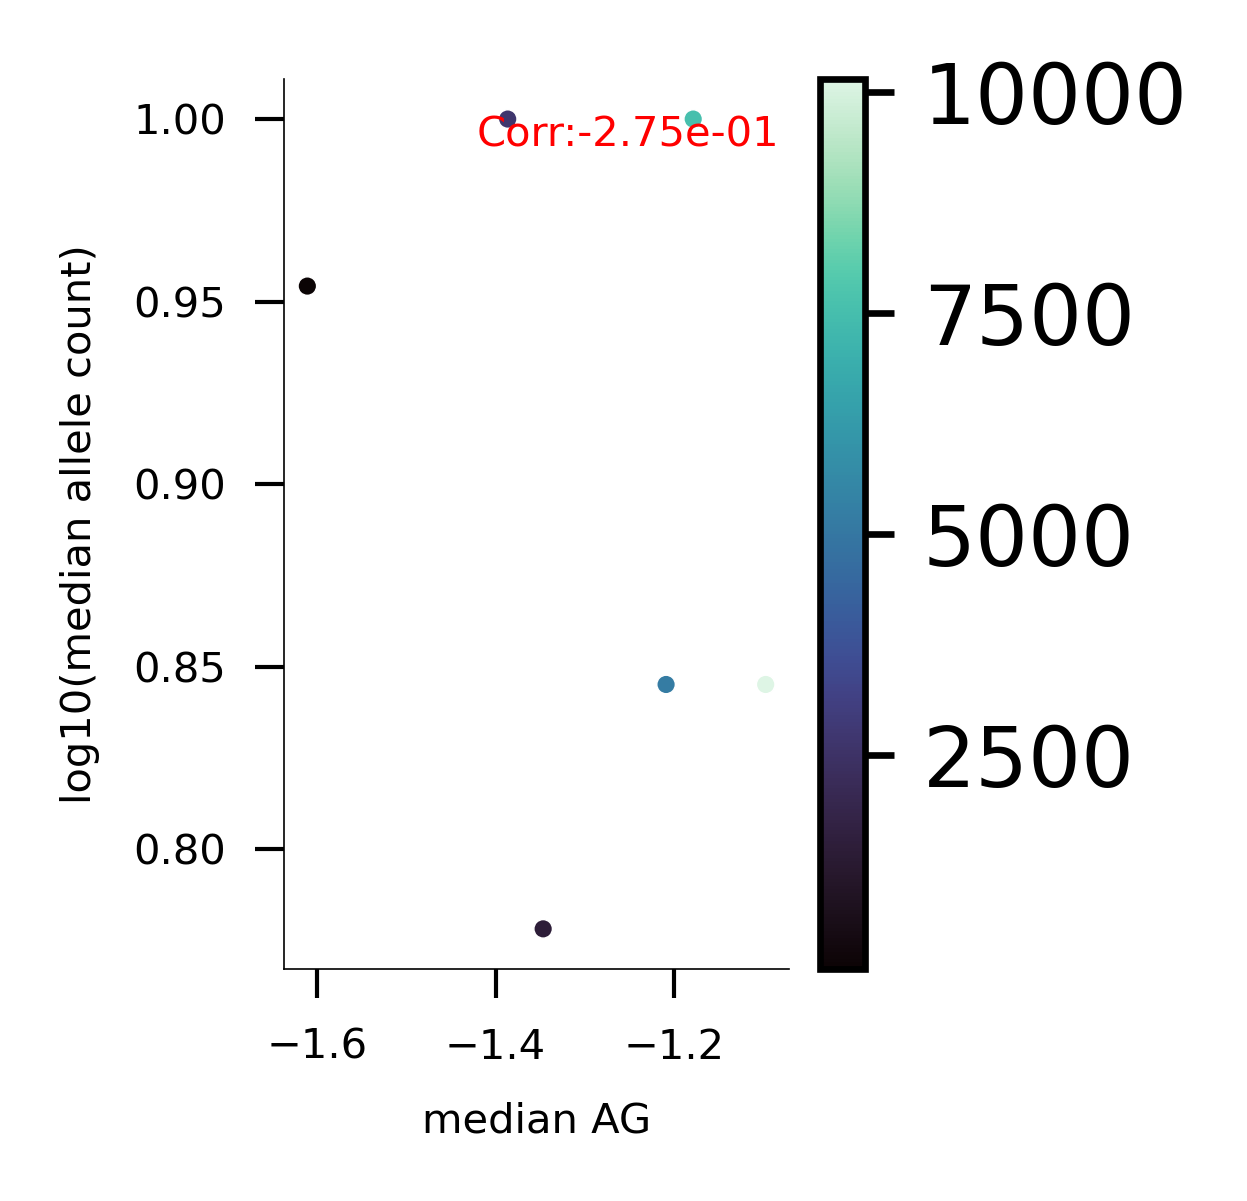

In [26]:
fig, ax = plt.subplots(1,  1, dpi = 600, figsize = (2.1, 2.1), sharex=True)
ax=plot_scatter(all_mutation,  x_column = "AG", y_column = "allele count", ax=ax,  logy=True)
# plt.savefig()